# Notatki do pracowni drugiej

Rozwiązujemy układ równań

\begin{equation}
(x-x_1)^2 + (y-y_1)^2 + (z-z_1)^2 = \big[c(t_1-t)\big]^2 \\
(x-x_2)^2 + (y-y_2)^2 + (z-z_2)^2 = \big[c(t_2-t)\big]^2 \\
(x-x_3)^2 + (y-y_3)^2 + (z-z_3)^2 = \big[c(t_3-t)\big]^2 \\
(x-x_4)^2 + (y-y_4)^2 + (z-z_4)^2 = \big[c(t_4-t)\big]^2 \\
\end{equation}

Niech
\begin{equation}
f_i(x, y, z, t) = (x-x_i)^2 + (y-y_i)^2 + (z-z_i)^2 - \big[c(t_i-t)\big]^2
\end{equation}

## Metoda Newtona

Z uogólnionego twierdzenia Taylora mamy
\begin{equation}
f_i(x + h_x, y + h_y, z + h_z, t + h_t) \approx f_i(x, y, z, t) + h_x \frac{\partial f_i}{\partial x}(x, y, z, t) 
+ h_y \frac{\partial f_i}{\partial y}(x, y, z, t) + h_z \frac{\partial f_i}{\partial z}(x, y, z, t)
+ h_t \frac{\partial f_i}{\partial t}(x, y, z, t)
\end{equation}

Ponadto
\begin{equation}
\frac{\partial f_i}{\partial x} = 2(x-x_i) \\
\frac{\partial f_i}{\partial y} = 2(y-y_i) \\
\frac{\partial f_i}{\partial z} = 2(z-z_i) \\
\frac{\partial f_i}{\partial t} = -2c^2(t-t_i)
\end{equation}

Stąd
\begin{equation}
f_i(x + h_x, y + h_y, z + h_z, t + h_t) \approx f_i(x, y, z, t) + 2h_x(x-x_i) + 2h_y(y-y_i) + 2h_z(z-z_i) -2c^2h_t(t-t_i)
\end{equation}

Zastosujemy metodę Newtona. Chcemy znaleźć $x, y, z, t$, dla których $f_i(x, y, z, t) = 0$ dla $1 \leq i \leq 4$.
Niech $x_n \in \mathbb{R}^4$ będzie n-tym przybliżeniem metody Newtona. Szukamy $h \in \mathbb{R}^4$, takiego że
dla $x_{n+1} = x_n + h$ zajdzie $f_i(x_{n+1}) = 0$ dla $1 \leq i \leq 4$.

Niech
$$
x_n = 
    \begin{pmatrix}
    x \\
    y \\
    z \\
    t
    \end{pmatrix}
$$

Rozwiążemy układ równań
\begin{equation}
0 = f_1(x, y, z, t) + 2h_x(x-x_1) + 2h_y(y-y_1) + 2h_z(z-z_1) -2c^2h_t(t-t_1) \\
0 = f_2(x, y, z, t) + 2h_x(x-x_2) + 2h_y(y-y_2) + 2h_z(z-z_2) -2c^2h_t(t-t_2) \\
0 = f_3(x, y, z, t) + 2h_x(x-x_3) + 2h_y(y-y_3) + 2h_z(z-z_3) -2c^2h_t(t-t_3) \\
0 = f_4(x, y, z, t) + 2h_x(x-x_4) + 2h_y(y-y_4) + 2h_z(z-z_4) -2c^2h_t(t-t_4)
\end{equation}
Inaczej
\begin{equation}
\begin{pmatrix}
x-x_1  & y-y_1 & z-z_1 & -c^2(t-t_1) \\
x-x_2  & y-y_2 & z-z_2 & -c^2(t-t_2) \\
x-x_3  & y-y_3 & z-z_3 & -c^2(t-t_3) \\
x-x_4  & y-y_4 & z-z_4 & -c^2(t-t_4) \\
\end{pmatrix}
\begin{pmatrix}
h_x \\ h_y \\ h_z \\ h_t
\end{pmatrix}
=
-\frac{1}{2}
\begin{pmatrix}
f_1(x, y, z, t) \\
f_2(x, y, z, t) \\
f_3(x, y, z, t) \\
f_4(x, y, z, t)
\end{pmatrix}
\end{equation}

Wtedy 
$$
x_{n+1} = x_n + h = x_n + \begin{pmatrix} h_x \\ h_y \\ h_z \\ h_t \end{pmatrix}
$$

In [2]:
c = 299792.458;

In [3]:
function fsingle(x, sat)
    a = (x - sat) .^ 2
    a[4] *= -c^2
    sum(a)
end

function fvect(x, sats)
    [fsingle(x, sats[i]) for i = 1:length(sats)]
end

function getcoeffs(x, sats)
    A = [x - sats[i] for i = 1:length(sats)]
    A = hcat(A...)'
    A[:, 4] *= -c^2
    A
end

function newton(sats, maxiter)
    x = [0, 0, 6370, 0]
    for i = 1:maxiter
        A = getcoeffs(x, sats)
        B = fvect(x, sats)
        h = -0.5 * (A \ B)
        x = x + h
    end
    x
end;

## Metoda algebraiczna

Zastosujemy inne podejście (nieiteracyjne). Rozważany układ równań wygląda następująco

$$
x^2 + y^2 + z^2 -2xx_1 -2yy_1 -2zz_1 + x_1^2 + y_1^2 + z_1^2 = c^2(t^2 -2tt_1 + t_1^2) \\
x^2 + y^2 + z^2 -2xx_2 -2yy_2 -2zz_2 + x_2^2 + y_2^2 + z_2^2 = c^2(t^2 -2tt_2 + t_2^2) \\
x^2 + y^2 + z^2 -2xx_3 -2yy_3 -2zz_3 + x_3^2 + y_3^2 + z_3^2 = c^2(t^2 -2tt_3 + t_3^2) \\
x^2 + y^2 + z^2 -2xx_4 -2yy_4 -2zz_4 + x_4^2 + y_4^2 + z_4^2 = c^2(t^2 -2tt_4 + t_4^2)
$$

Po odjęciu czwartego równania stronami od pierwszych trzech otrzymamy

$$
-2x(x_1-x_4) -2y(y_1-y_4) -2z(z_1-z_4) + x_1^2 + y_1^2 + z_1^2 - (x_4^2 + y_4^2 + z_4^2) = c^2(-2t(t_1-t_4)+t_1^2-t_4^2) \\
-2x(x_2-x_4) -2y(y_2-y_4) -2z(z_2-z_4) + x_2^2 + y_2^2 + z_2^2 - (x_4^2 + y_4^2 + z_4^2) = c^2(-2t(t_2-t_4)+t_2^2-t_4^2) \\ 
-2x(x_3-x_4) -2y(y_3-y_4) -2z(z_3-z_4) + x_3^2 + y_3^2 + z_3^2 - (x_4^2 + y_4^2 + z_4^2) = c^2(-2t(t_3-t_4)+t_3^2-t_4^2)
$$

Otrzymaliśmy więc układ 3 równań liniowych na 4 zmiennych. Układ taki nie posiada jednozanczego rozwiązania, ale - o ile nie jest sprzeczny - posiada rozwiązania parametryczne. W naszym przypadku (dla realnych danych) powinno to być rozwiązanie zależne od jednego parametru. Oznacza to, że pozostałe zmienne można wyrazić jako kombinacje liniowe tego parametru tak, aby dla dowolnej wartości parametru układ równań był spełniony. Ponieważ dla faktycznych danych żadna zmienna nie powinna być z góry ustalona (na trzech równaniach), to możemy założyć, że parametrem jest $t$. Wtedy dla pewnych rzeczywistych $a_x, a_y, a_z, b_x, b_y, b_z$ mamy

$$ 
x = a_xt + b_x \\
y = a_yt + b_y \\
z = a_zt + b_z
$$
Wówczas dla dowolnego $t$ zachodzi

$$
-2(a_xt+b_x)(x_1-x_4)-2(a_yt+b_y)(y_1-y_4)-2(a_xt+b_z)(z_1-z_4)+x_1^2+y_1^2+z_1^2-c_0=c^2(-2t(t_1-t_4)+t_1^2-t_4^2) \\
-2(a_xt+b_x)(x_2-x_4)-2(a_yt+b_y)(y_2-y_4)-2(a_xt+b_z)(z_2-z_4)+x_2^2+y_2^2+z_2^2-c_0=c^2(-2t(t_2-t_4)+t_2^2-t_4^2) \\
-2(a_xt+b_x)(x_3-x_4)-2(a_yt+b_y)(y_3-y_4)-2(a_xt+b_z)(z_3-z_4)+x_3^2+y_3^2+z_3^2-c_0=c^2(-2t(t_3-t_4)+t_3^2-t_4^2)
$$

gdzie $c_0 = x_4^2 + y_4^2 + z_4^2$.

Otrzymaliśmy zatem równości trzech funckji liniowych dla każdego argumentu. 

Stąd
$$
a_x(x_1-x_4) + a_y(y_1-y_4) + a_z(z_1-z_4) = c^2(t_1-t_4) \\
a_x(x_2-x_4) + a_y(y_2-y_4) + a_z(z_2-z_4) = c^2(t_2-t_4) \\
a_x(x_3-x_4) + a_y(y_3-y_4) + a_z(z_3-z_4) = c^2(t_3-t_4) \\
-2(b_x(x_1-x_4)+b_y(y_1-y_4)+b_z(z_1-z_4)) + x_1^2+y_1^2+z_1^2 - c_0 = c^2(t_1^2 - t_4^2) \\
-2(b_x(x_2-x_4)+b_y(y_2-y_4)+b_z(z_2-z_4)) + x_2^2+y_2^2+z_2^2 - c_0 = c^2(t_2^2 - t_4^2) \\
-2(b_x(x_3-x_4)+b_y(y_3-y_4)+b_z(z_3-z_4)) + x_3^2+y_3^2+z_3^2 - c_0 = c^2(t_3^2 - t_4^2)
$$

Inaczej
$$
\begin{pmatrix}
x_1-x_4 & y_1-y_4 & z_1-z_4 \\
x_2-x_4 & y_2-y_4 & z_2-z_4 \\
x_3-x_4 & y_3-y_4 & z_3-z_4
\end{pmatrix}
\begin{pmatrix}
a_x \\ a_y \\ a_z
\end{pmatrix}
=
c^2
\begin{pmatrix}
t_1-t_4 \\ t_2-t_4 \\ t_3-t_4
\end{pmatrix}
\\
\begin{pmatrix}
x_1-x_4 & y_1-y_4 & z_1-z_4 \\
x_2-x_4 & y_2-y_4 & z_2-z_4 \\
x_3-x_4 & y_3-y_4 & z_3-z_4
\end{pmatrix}
\begin{pmatrix}
b_x \\ b_y \\ b_z
\end{pmatrix}
=
-\frac{1}{2}
\begin{pmatrix}
c^2(t_1^2-t_4^2) - x_1^2+y_1^2+z_1^2 + c_0 \\
c^2(t_2^2-t_4^2) - x_2^2+y_2^2+z_1^2 + c_0 \\
c^2(t_3^2-t_4^2) - x_3^2+y_3^2+z_1^2 + c_0 
\end{pmatrix}
$$

Z ostatnich dwóch równości możemy łatwo wyznaczyć współczynniki $a_x, a_y, a_z, b_x, b_y, b_z$.

Aby otrzymać konkretne rozwiązanie, możemy podstawić otrzymane zależności do czwartego równania. Wtedy otrzymamy równanie kwadratowe jednej zmiennej następującej postaci

$$
  t^2(a_x^2+a_y^2+a_x^2-c^2) + 2t(a_x(b_x-x_4)+a_y(b_y-y_4)+a_z(b_z-z_4)-c^2t_4^2) + (b_x-x_4)^2+(b_y-y_4)^2+(b_z-z_4)-c^2t_4^2 = 0
$$

Po rozwiązaniu równania otrzymamy dwa kandydaty (?) na $t$, które wyznaczą dwa możliwe rozwiązania $x, y, z, t$. W poniższym kodzie przyjęto, że szukanym rozwiązaniem jest to o mniejszym bezwzględnym błędzie zegara.

In [4]:
using Polynomials

function algebraic(sats)
    x = [sat[1:3] for sat in sats]
    t = [sat[4] for sat in sats]
    A = hcat([x[i] - x[4] for i = 1:3]...)'
    B = c^2 * (t[1:3] .- t[4])
    sum4 = sum(x[4] .^ 2)
    C = -0.5 * [ c^2*(t[i]^2 - t[4]^2) - sum(x[i] .^ 2) + sum4 for i = 1:3]
    
    a = A \ B
    b = A \ C
    bdiff = b - x[4]
    
    coeffs = Array{Float64}(3)
    coeffs[1] = sum(bdiff .^ 2) - c^2*t[4]^2
    coeffs[2] = 2*(sum(a .* bdiff) + c^2*t[4])
    coeffs[3] = sum(a.^2) - c^2
    rts = filter(x -> isreal(x), roots(Poly(coeffs)))
    guess = rts[indmin(abs.(rts))]
    
    vcat([a[i]*guess + b[i] for i = 1:3], guess)
end; 

## Testy

In [5]:
function prepsat!(x, sat)
    for i = 1:length(sat)
        sat[i][4] = norm(x[1:3]-sat[i][1:3]) / c + x[4]
    end
end

sat = Array{Array{Float64}}(4)

sat[1] = [15600.0, 7540.0, 20140.0, 7.074e-2]
sat[2] = [18760.0, 2750.0, 18610.0, 7.220e-2]
sat[3] = [17610.0, 14630.0, 13480.0, 7.690e-2]
sat[4] = [19170.0, 610.0, 18390.0, 7.242e-2]

println(newton(sat, 15))
println(algebraic(sat))

[-41.7727, -16.7892, 6370.06, -0.00320157]
[-41.7727, -16.7892, 6370.06, -0.00320157]


In [6]:
using PyPlot

INFO: Recompiling stale cache file /Users/kubaz/.julia/lib/v0.6/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /Users/kubaz/.julia/lib/v0.6/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/kubaz/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/kubaz/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


NEWTON
BIGGEST MISTAKE : 25.860929257551064 meters


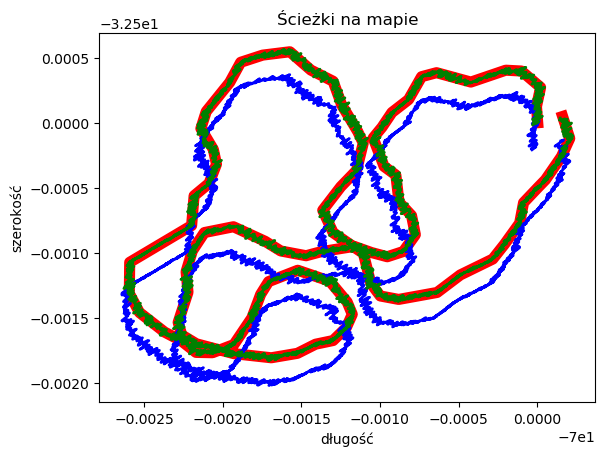

SMALLEST MISTAKE : 18.698761078984912 meters
ALGEBRAIC
BIGGEST MISTAKE : 5.038267450397004 meters
SMALLEST MISTAKE : 0.019925574250612654 meters


In [7]:
function randSgn()
    x = rand(0:1)
    if x==0
        return -1
    else
        return 1
    end
end

function path(maxiter, lon0, lat0)
    a = pi/4
    d = 0.000005
    lon = lon0 + d*cos(a)
    lat = lat0 + d*sin(a)
    t=0
    res = [[], []]
    for i in 1:maxiter
        push!(res[1], lon)
        push!(res[2], lat)
        if t==0
            t = rand(20:50)
            da = rand()*randSgn()
            a +=da
        end
        lon += d*cos(a)
        lat += d*sin(a)
        t-=1
    end
    res
end

function LLAtoXYZ(LL)
    rad = 6378.1
    lon = LL[1]
    lat = LL[2]
    cosLat = cos(lat * pi / 180.0)
    sinLat = sin(lat * pi / 180.0)
    cosLon = cos(lon * pi / 180.0)
    sinLon = sin(lon * pi / 180.0)
    x = rad * cosLat * cosLon
    y = rad * cosLat * sinLon
    z = rad * sinLat
    [x, y, z]
end

function XYZtoLLA(X)
    rad = 6378.1
    x = X[1]
    y = X[2]
    z = X[3]
    lat = asin(z / rad) * 180 / pi
    lon = atan(y / x) * 180 / pi
    return [lon, lat]
end

function inaccuracy()
    (1 + rand()/500000000)
end

function countTime(mistake, Pos, sat)
    C = 299792.458
    dist = sqrt(sum( [ (Pos[i]-sat[i])^2 for i in 1:3]))
    t = dist / C
    return [t + mistake]*inaccuracy()
end


sat1 = [15600,7540,20140]
sat2 = [18760,2750,18610]
sat3 = [17610,14630,13480]
sat4 = [19170,610,18390]

function createSats(lon, lat, mistake)
    sat = Array{Array{Float64}}(4)
    sat[1] = vcat(sat1, countTime(mistake, LLAtoXYZ([lon, lat]), sat1) )
    sat[2] = vcat(sat2, countTime(mistake, LLAtoXYZ([lon, lat]), sat2) )
    sat[3] = vcat(sat3, countTime(mistake, LLAtoXYZ([lon, lat]), sat3) )
    sat[4] = vcat(sat4, countTime(mistake, LLAtoXYZ([lon, lat]), sat4) )
    sat
end

function GPS_newton(coords, mistake, maxiter)
    res = [[],[]]
    for i in 1:length(coords[1])
        sat = createSats(coords[1][i], coords[2][i], mistake)
        X = newton(sat, maxiter)
        LL = XYZtoLLA(X[1:3])
        push!(res[1], LL[1])
        push!(res[2], LL[2])
    end
    return res
end

function GPS_alg(coords, mistake)
    res = [[],[]]
    for i in 1:length(coords[1])
        sat = createSats(coords[1][i], coords[2][i], mistake)
        X = algebraic(sat)
        LL = XYZtoLLA(X[1:3])
        push!(res[1], LL[1])
        push!(res[2], LL[2])
    end
    return res
end

function MAXdist(coords, gps)
    res = 0.0
    for i in 1:length(coords[1])
        X1 = LLAtoXYZ([coords[1][i], coords[2][i]])
        X2 = LLAtoXYZ([gps[1][i], gps[2][i]])
        d =sqrt(sum([(X1[i]-X2[i])^2   for i in 1:3] ))
        res = max(res, d)
    end
    return res*1000
end

function MINdist(coords, gps)
    res = 100000.0
    for i in 1:length(coords[1])
        X1 = LLAtoXYZ([coords[1][i], coords[2][i]])
        X2 = LLAtoXYZ([gps[1][i], gps[2][i]])
        d =sqrt(sum([(X1[i]-X2[i])^2   for i in 1:3] ))
        res = min(res, d)
    end
    return res*1000
end

coords = path(3000, -70, -32.5)
x = coords[1]
y = coords[2]

mistake = 0.005

newton_coords = GPS_newton(coords, mistake, 3)
xn = newton_coords[1]
yn = newton_coords[2]

alg_coords = GPS_alg(coords, mistake)
xa = alg_coords[1]
ya = alg_coords[2]

fig, ax = subplots()

title("Ścieżki na mapie")
xlabel("długość")
ylabel("szerokość")
ax[:plot](x, y, "-", color="red", linewidth=8, alpha=1.0)
ax[:plot](xn, yn, "-", color="blue", linewidth=2, alpha=1.0)
ax[:plot](xa, ya, "-", color="green", linewidth=2, alpha=1.0)
show()


println("NEWTON")
println("BIGGEST MISTAKE : ", MAXdist(coords, newton_coords), " meters")
println("SMALLEST MISTAKE : ", MINdist(coords, newton_coords), " meters")
println("ALGEBRAIC")
println("BIGGEST MISTAKE : ", MAXdist(coords, alg_coords), " meters")
println("SMALLEST MISTAKE : ", MINdist(coords, alg_coords), " meters")


In [8]:
function alg_mistake_plot(coords, maxiter)
    res = [[], []]
    dm = 0.05
    mistake = 0.0
    for i in 1:maxiter
        alg_coords = GPS_alg(coords, mistake)
        dist = MAXdist(coords, alg_coords)
        push!(res[1], mistake)
        push!(res[2], dist)
        mistake+=dm
    end
    res
end
show()

Maksymalny błąd gpsa w zależności od błędu zegara

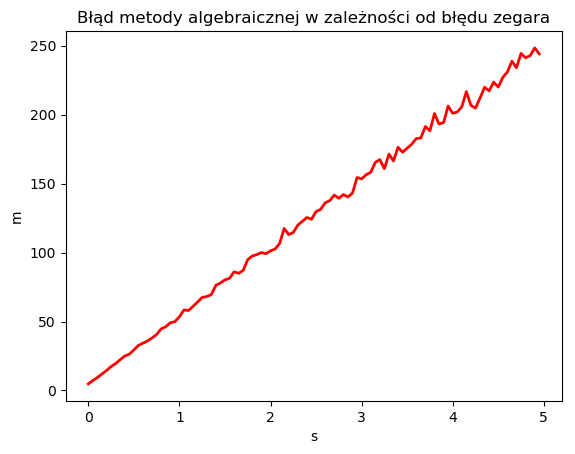

In [9]:
data = alg_mistake_plot(coords, 100)
x = data[1]
y = data[2]

fig, ax = subplots()

title("Błąd metody algebraicznej w zależności od błędu zegara")
ylabel("m")
xlabel("s")
ax[:plot](x, y, "-", color="red", linewidth=2, alpha=1.0)
show()

maksymalny błąd metody newtona w zależnosći od liczby iteracji

In [10]:
function newton_mistake_plot(coords, maxiter)
    res = [[], []]
    for i in 1:maxiter
        newton_coords = GPS_newton(coords, 0.005, i)
        dist = MAXdist(coords, newton_coords)
        push!(res[1], i)
        push!(res[2], dist)
    end
    return res
end
show()

In [11]:
data = newton_mistake_plot(coords, 10)
x = data[1]
y = data[2]

for i in 1:10
    println(x[i], " : ", y[i])
end

1 : 312094.32303452666
2 : 13412.123708393967
3 : 25.95108166968248
4 : 5.069506189618033
5 : 4.994959501618675
6 : 4.9528347964540105
7 : 5.073334000378122
8 : 4.906642769067785
9 : 5.111618612765884
10 : 4.939642038824356
